# Plot non-result figures

## Locally-linear data visualization

In [70]:
import os, sys

code_folder=os.path.join(os.getcwd(),
                         "..",
                         "0_code"
                        )
rawdata_folder=os.path.join(os.getcwd(),
                            "..",
                            "rawdata"
                           )
sys.path.append(code_folder)
sys.path.append(rawdata_folder)

In [64]:
from data_generation.Synthetic import LocallyLinearManifold

ll_data=LocallyLinearManifold(
    n_points=1000,
    n_dim=10,
    n_clusters=4,
    n_knn=20,
    n_shape_manifold=100,
    d_shape_manifold=0.1,
    T_coef=0.2,
    u_gen='random'
)
X,y=ll_data.fit()

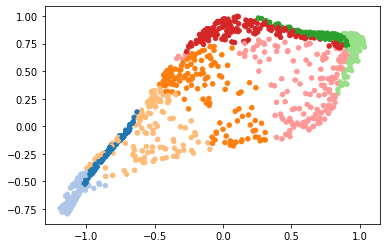

In [88]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors

fig = plt.figure()
ax = fig.add_subplot(111)
C=list(map(lambda i: ll_data.cluster_labels[i]*2+y[i], range(len(X))))
cmap=cm.get_cmap("tab20")
norm=colors.Normalize(vmin=0, vmax=19)
ax.scatter(X[:,0], X[:,1],
           c=cmap(norm(C), ),
           s=20
          )

(-1.3512587034667445,
 2.1595837477841306,
 -2.1499046393057513,
 1.147997425420773)

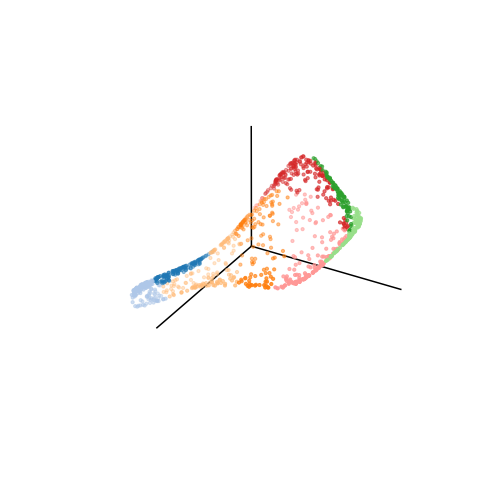

In [124]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
C=list(map(lambda i: ll_data.cluster_labels[i]*2+y[i], range(len(X))))
cmap=cm.get_cmap("tab20")
norm=colors.Normalize(vmin=0, vmax=19)
ax.scatter(X[:,0], X[:,1], X[:,2],
           c=cmap(norm(C), ),
           s=10
          )
ax.plot([0,0],[0,0],[0,2.],c='k')
ax.plot([0,0],[0,-2.],[0,0],c='k')
ax.plot([0,2.],[0,0],[0,0],c='k')
plt.axis('off')

In [136]:
import matplotlib.colors as mcolors
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig



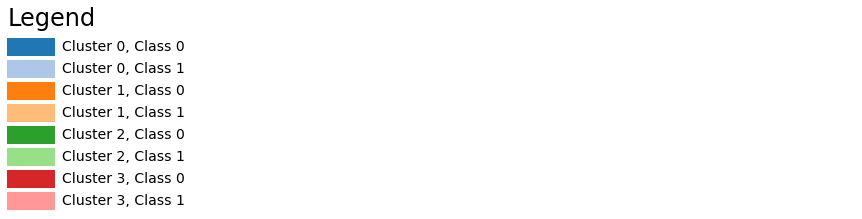

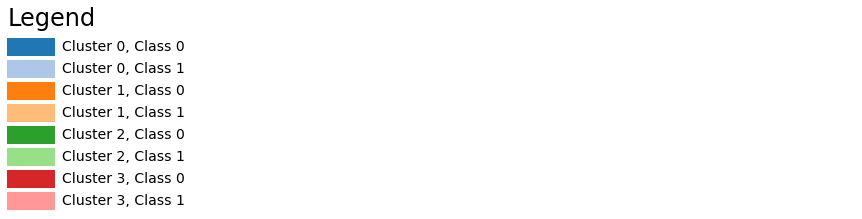

In [135]:
col_dict={}
vals=cmap(norm(range(8)))

for idx, c in enumerate(vals):
    clus=idx//2
    _y=idx-clus*2
    col_dict[f"Cluster {clus}, Class {_y}"]=c
    
plot_colortable(col_dict, "Legend",
                sort_colors=False, emptycols=3)

## Locally-Linear Synthetic Dataset with cluster-specific noise

In [37]:
from data_generation.Synthetic import LocallyLinearManifold

ll_data=LocallyLinearManifold(
    n_points=1000,
    n_dim=10,
    n_clusters=5,
    n_knn=20,
    n_shape_manifold=100,
    d_shape_manifold=0.1,
    T_coef=0.2,
    u_gen='random',
    random_seed=12
)
X,y=ll_data.fit()

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, '')]

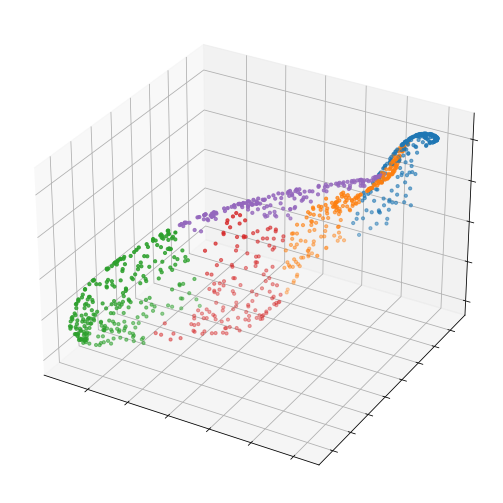

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm, colors

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
C=list(map(lambda i: ll_data.cluster_labels[i]*2+y[i], range(len(X))))
cmap=cm.get_cmap("tab20")
norm=colors.Normalize(vmin=0, vmax=19)
ax.scatter(X[:,0], X[:,1], X[:,3],
           c=cmap(norm(C), ),
           s=10
          )
# ax.plot([0,0],[0,0],[0,2.],c='k')
# ax.plot([0,0],[0,-2.],[0,0],c='k')
# ax.plot([0,2.],[0,0],[0,0],c='k')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, '')]

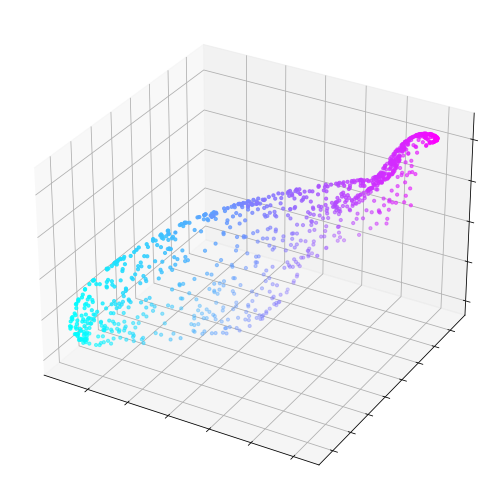

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm, colors

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
C=list(map(lambda i: ll_data.cluster_labels[i]*2+y[i], range(len(X))))
cmap=cm.get_cmap("tab20")
norm=colors.Normalize(vmin=0, vmax=19)
ax.scatter(X[:,0], X[:,1], X[:,3],
           c=X[:,0],
           cmap='cool',
           s=10
          )
# ax.plot([0,0],[0,0],[0,2.],c='k')
# ax.plot([0,0],[0,-2.],[0,0],c='k')
# ax.plot([0,2.],[0,0],[0,0],c='k')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, '')]

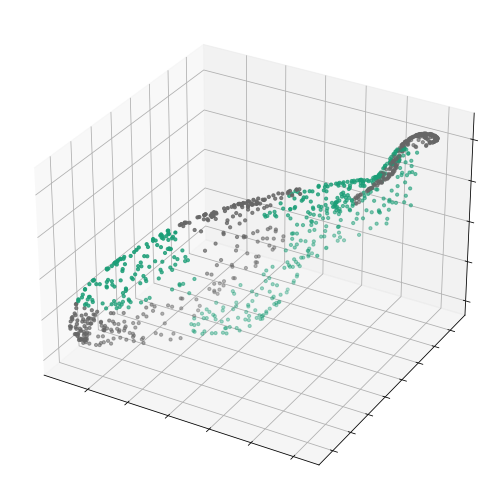

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm, colors

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
C=list(map(lambda i: ll_data.cluster_labels[i]*2+y[i], range(len(X))))
cmap=cm.get_cmap("Dark2")
norm=colors.Normalize(vmin=0, vmax=1)
ax.scatter(X[:,0], X[:,1], X[:,3],
           c=cmap(norm(y)),
           s=10
          )
# ax.plot([0,0],[0,0],[0,2.],c='k')
# ax.plot([0,0],[0,-2.],[0,0],c='k')
# ax.plot([0,2.],[0,0],[0,0],c='k')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

In [67]:
#Copied on 18/2/21

#Add cluster-specific noise (Should this step go before binary classification or after?)
## May no longer be a smooth manifold :(

import copy 
n_dim_noise=n_dim-5

all_noise_features=[]
means = [np.mean(X[:,i]) for i in range(X.shape[1])]
stds = [np.std(X[:,i]) for i in range(X.shape[1])]
X_noise = copy.deepcopy(X)
np.random.seed(123)
for cl in range(n_clusters):
    cl_ind=np.where( ll_data.cluster_labels==cl)[0]
    noise_features=np.sort(np.random.choice(range(1,n_dim), n_dim_noise, replace=False))
    all_noise_features.append(noise_features)
    for j in noise_features:
        X_noise[cl_ind, j]=0.1*np.random.normal(means[j], stds[j], size=len(cl_ind))
# X_noise=X+X_noise

from sklearn import preprocessing
def get_split(cluster_labels, prop=0.1):
    unique_labels=np.unique(cluster_labels)
    n_test=int(prop*len(cluster_labels))
    n_test_list=[int(n_test/len(unique_labels)) for i in range(len(unique_labels))]
    for i in np.random.choice(unique_labels, replace=False, size=n_test%len(unique_labels)):
        n_test_list[i]+=1
    test_inds=np.concatenate([np.random.choice(np.where(cluster_labels==unique_labels[i])[0],
                                replace=False, 
                                size=n_test_list[i]
                               ) for i in range(len(unique_labels))
                             ])
    test_inds=np.sort(test_inds)
    train_inds=np.setdiff1d(range(len(cluster_labels)), test_inds)
    return train_inds, test_inds

# X_scaled=preprocessing.scale(X_noise)
# np.random.seed(123)
# train_inds, test_inds=get_split(data_gen.cluster_labels)
# X_train=X_scaled[train_inds]
# X_test=X_scaled[test_inds]
# y_train=y[train_inds]
# y_test=y[test_inds]
# cluster_labels_train=data_gen.cluster_labels[train_inds]
# cluster_labels_test=data_gen.cluster_labels[test_inds]

[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, '')]

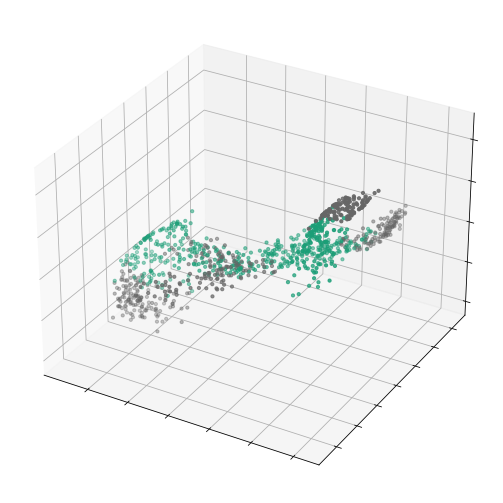

In [68]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm, colors

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
C=list(map(lambda i: ll_data.cluster_labels[i]*2+y[i], range(len(X))))
cmap=cm.get_cmap("Dark2")
norm=colors.Normalize(vmin=0, vmax=1)
ax.scatter(X_noise[:,0], X_noise[:,1], X_noise[:,3],
           c=cmap(norm(y)),
           s=10
          )
# ax.plot([0,0],[0,0],[0,2.],c='k')
# ax.plot([0,0],[0,-2.],[0,0],c='k')
# ax.plot([0,2.],[0,0],[0,0],c='k')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

# Plot Tox21 results vs challenge submissions

In [72]:
import pandas as pd
winners_df=pd.read_csv(os.path.join(rawdata_folder,
                                    "Tox21DataChallengeWinners.csv"
                                   ))

In [73]:
winners_df.head()

,Label,Best AUC-ROC,Group,Best Balanced Accuracy,DeepTox
0,NR-AR,0.827526,dmlab,0.735918,0.778
1,NR-AhR,0.927884,Bioinf@JKU,0.852759,0.923
2,NR-AR-LBD,0.879138,Bioinf@JKU-ensemble3,0.650044,0.825
3,NR-ER,0.809762,Bioinf@JKU-ensemble1,0.748956,0.791
4,NR-ER-LBD,0.827328,microsomes,0.714655,0.811


In [135]:
winners_df['DeepTox']

0     0.778
1     0.923
2     0.825
3     0.791
4     0.811
5     0.804
6     0.856
7     0.829
8     0.775
9     0.863
10    0.930
11    0.860
Name: DeepTox, dtype: float64

In [136]:
labels=winners_df['Label']
winners_y=winners_df['Best AUC-ROC']
deeptox_y=winners_df['DeepTox']

LLDLwFW_y=[0.866415, #NR-AR
           0.891773, #NR-AhR
           0.86152, #NR-AR-LBD
           0.800197, #NR-ER
           0.797399, #NR-ER-LBD
           0.80839, #NR-Aromatase
           0.79479, #NR-PPAR-gamma
           0.767862, #SR-ARE
           0.80965, #SR-ATAD5 in progress
           0.82646, #SR-HSE
           0.92903, #SR-MMP
           0.83683, #SR-p53 TBD
          ]

Text(0, 0.5, 'AUC')

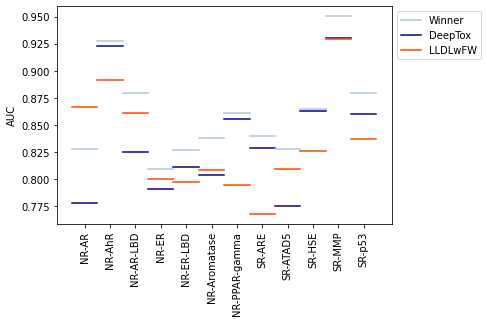

In [139]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x_plot=np.arange(12)

for i in range(len(labels)):
    xx=[x_plot[i], x_plot[i]+1]
    ax.plot(xx, [winners_y[i]]*2, c='lightsteelblue', label="Winner")
    ax.plot(xx, [deeptox_y[i]]*2, c='darkblue', label="DeepTox")
    ax.plot(xx, [LLDLwFW_y[i]]*2, c='orangered', label="LLDLwFW")
ax.legend(["Winner", "DeepTox", "LLDLwFW"],
          bbox_to_anchor=(1,1)
         )
ax.set_xticks(np.arange(12)+0.5)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("AUC")
# ax.bar(x_plot, deeptox_y, label="DeepTox")
# ax.bar(x_plot, LLDLwFW_y, label="LLDLwFW")

Deeptox: 801 input features, 1-4 hidden layers, hidden units: {1024,2048, 4096, 8192, 16384}

In [129]:
802*16384

13139968

In [131]:
16385*10

163850

In [132]:
13139968+268451840+268451840+268451840+163850

818659338